In [1]:
pip install openpyxl wordcloud konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.6 MB/s eta 0:00:00


In [2]:
# 나눔고딕 설치
!sudo apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,724 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [34]:
import openpyxl
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt



In [35]:
# 엑셀 파일 경로 설정
excel_file_path = "/content/drive/MyDrive/11조/총_민원_데이터.xlsx"
sheet_name = "Sheet1"  # 시트 이름

In [36]:
# 엑셀 파일 로드
wb = openpyxl.load_workbook(excel_file_path)
sheet = wb[sheet_name]

In [37]:
# 엑셀 시트에서 텍스트 데이터 추출 및 형태소 분석
text_data = ""
okt = Okt()
for row in sheet.iter_rows(values_only=True):
    for cell in row:
        if isinstance(cell, str):
            text_data += cell + " "

In [78]:
# 제거할 단어 리스트
words_to_remove = ["대하", "따라서", "하라","나마", "자서", "최금", "가가", "필합", "루어", "대서", "딸아", "주자", "래서", "가나","가라","야합","민신","개방","가족","미모","런데","문","혼","대한","때","급","점","도","생","경우","습","한부모","미혼모", "것","때문","이","제대로","못","중","거나","가운데","등","육박","및","배","가량","속","수","감","위","시점","대효","가정은","세","미만","보통","상위","부분","개월","간의","마치","후","아무","동안","정규","내내","다음","또한","의","오히려","더","단지","임","정인","로서","고려","유지","시","해","줄","전모","각","층","료","급시","정말","게다가","일부러","이용도","란","지금","줄줄","비","국","명","이상인","무조건","왜","구분","이하","푼","요","고작","조금","외제차","당장","정이","이상","마찬가지","이구","달라","간곡","것를","좀","진정","무엇","파악","화가","이드","주어","밑","단","명도","과연","부여","주지","저","그","과","제","바로","치가","처럼","지난","뒤","위해","짛","안","테","쪽","가지","정지원","더욱","일인","랴짐","꼭","고본","가액","다","구가","이경제","다른","다른","누군가","통","이기","등등","비단","뭔가","무언가","라며","낼","고","일이","정","시한","로부터","인","월","연","초생","를","미보","유","기타","만큼","선","여느","도모","일도","더군다나","치","제외","함","좀더","나은","뿐","각종","각층","자년","관련","타","완료","그러케","도대체","거기","팔지","이제","그것","듯이","을해","한참","광","축","에마","채감","써비","스","전부","실","이소리","반드시","적","또","즉시","진","건","부부인","부청","부로","만들기","어쩌면","당햐","언제","색","북","준","성행","만약","곳","괜잖겠","심지어","부터","어쩐지","게","막","자체","조","육모","여러","더구나","최대","혼모","선뜻","그냥","통한","설령","대세","율","경상남도교육청","수가","활","창","두","잡","안이","번","전","것이므","거","살때","식이","일로","낼때","내지","이건","뭐"]  # 필요한 단어로 수정

In [79]:
# 제거할 단어들을 반복하여 삭제
for word in words_to_remove:
    text_data = text_data.replace(word, "")

In [80]:
# 형태소 분석 후 명사만 추출
nouns = okt.nouns(text_data)

In [81]:
# 한 글자 단어 제거
nouns = [word for word in nouns if len(word) > 1]

In [82]:
# 빈도수 계산
noun_counter = Counter(nouns)

In [84]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path="NanumGothic.ttf", background_color="white", width=800, height=800).generate_from_frequencies(noun_counter)

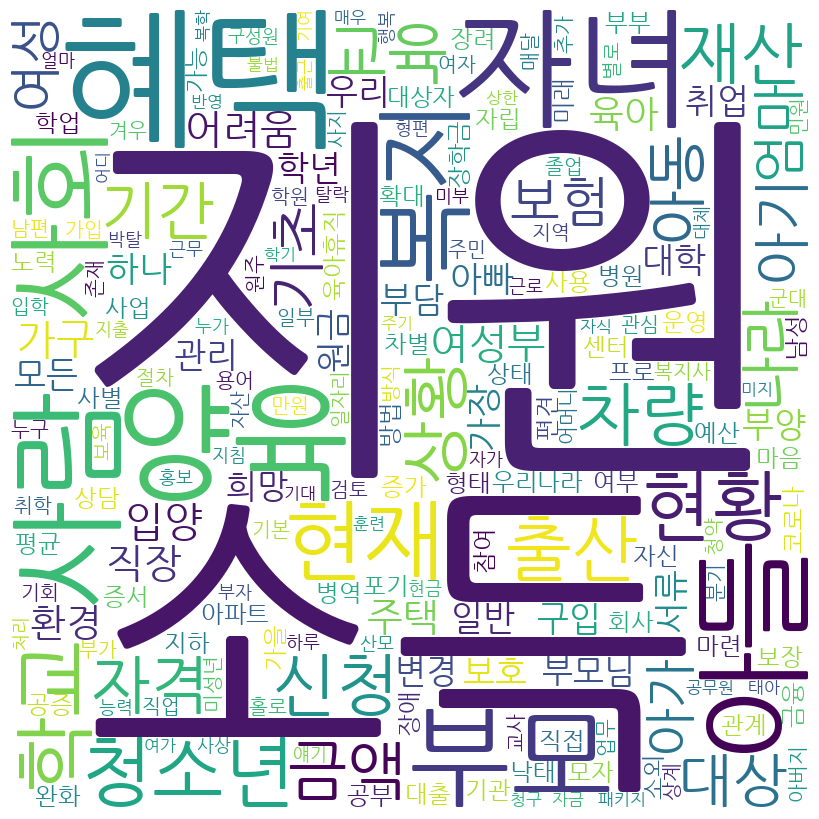

In [85]:
# 워드 클라우드 이미지 보여주기
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [ ]:
# 워드 클라우드 이미지 파일로 저장
wordcloud_image_path = "wordcloud.png"
plt.savefig(wordcloud_image_path, format="png")


In [ ]:
# 워드 클라우드 이미지 보여주기
plt.show()